 #                                                  STATISTICAL THINKING

## Introduction
The Millennium Development Goals were a set of 8 goals for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. Key indicators were defined for each of these goals, to see whether they were being met. We will have a look at some of the key indicators from Goal 7: Ensure environmental sustainability, namely carbon dioxide emissions, protected land and sea areas, and forests.

* We will explore the dataset provided and analyse the polution behaviours of the countries over the past years.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats.stats import pearsonr

import warnings
warnings.filterwarnings('ignore')


sns.set()

In [2]:
mdg_data = pd.read_csv("Datasets/mdg.csv")
mdg_data.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


In [3]:
mdg_data.shape

(690, 95)

 The Dataframe has 690 rows and 95 Columns

#### Inspecting the data

In [4]:
#filling the empty spaces with NAN
mdg_data.replace(r'^\s*$', np.nan, regex=True, inplace = True)

###### checking and separating the dataset by series 


In [5]:
#number of countries represented
country = mdg_data['Country'].nunique()
print('number of countries =', country)

#number of series
series = mdg_data['Series'].nunique()
print('number of series = ',series)

series_list = mdg_data['Series'].unique()
print('series list = ', series_list)

number of countries = 230
number of series =  3
series list =  ['Proportion of land area covered by forest, percentage'
 'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)'
 'Terrestrial and marine areas protected to total territorial area, percentage']


In [6]:
#seperating datasets based on series  

# Propotion of land area covered by forest DataFrame
mdg_proportion_of_land = mdg_data[mdg_data['Series'] ==  "Proportion of land area covered by forest, percentage"]
display('Proportion of land dataframe' ,mdg_proportion_of_land.head())

# Terrestrial and marine areas protected to total territorial area DataFrame
mdg_terrestrail = mdg_data[mdg_data['Series'] ==  'Terrestrial and marine areas protected to total territorial area, percentage']
display('Terrestrial and marine DataFrame' ,mdg_terrestrail.head())

# Carbon dioxide emissions (CO2) Dataframe
mdg_carbon_emission = mdg_data[mdg_data['Series'] ==  'Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)']
display('Carbon Emission DataFrame', mdg_carbon_emission.head())

'Proportion of land dataframe'

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,16,American Samoa,567,Y,"Proportion of land area covered by forest, per...",90,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,20,Andorra,567,Y,"Proportion of land area covered by forest, per...",35.6,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Terrestrial and marine DataFrame'

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,16,American Samoa,616,Y,Terrestrial and marine areas protected to tota...,0.06,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,20,Andorra,616,Y,Terrestrial and marine areas protected to tota...,5.53,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


'Carbon Emission DataFrame'

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,NaN,G,81220.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,16,American Samoa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### MISSING VALUES AND EMPTY COLUMNS

* **Propotion of land area covered by forest**

In [7]:
mdg_proportion_of_land = mdg_proportion_of_land.dropna(how='all', axis='columns')
display('Proportion of Land  ' , mdg_proportion_of_land.head())


'Proportion of Land  '

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,2000,Footnotes.10,Type.10,2005,Footnotes.15,Type.15,2010,Footnotes.20,Type.20
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,2.1,NaN,E,2.1,NaN,E,2.1,NaN,E
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,28.1,NaN,C,28.5,NaN,C,28.3,NaN,C
6,12,Algeria,567,Y,"Proportion of land area covered by forest, per...",0.7,NaN,C,0.7,NaN,C,0.6,NaN,C,0.6,NaN,C
9,16,American Samoa,567,Y,"Proportion of land area covered by forest, per...",90,NaN,C,90,NaN,C,90,NaN,C,90,NaN,C
12,20,Andorra,567,Y,"Proportion of land area covered by forest, per...",35.6,NaN,E,35.6,NaN,E,35.6,NaN,E,35.6,NaN,E


* **Terrestrial and marine areas protected to total territorial**

In [8]:
mdg_terrestrail = mdg_terrestrail.dropna(how='all', axis='columns')
display('Terrestrail and Marine', mdg_terrestrail.head())



'Terrestrail and Marine'

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,2000,Type.10,2014,Type.24
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,C,0.36,C,0.46,C
5,8,Albania,616,Y,Terrestrial and marine areas protected to tota...,0.15,C,0.48,C,1.91,C
8,12,Algeria,616,Y,Terrestrial and marine areas protected to tota...,5.97,C,5.98,C,7.46,C
11,16,American Samoa,616,Y,Terrestrial and marine areas protected to tota...,0.06,C,0.06,C,8.62,C
14,20,Andorra,616,Y,Terrestrial and marine areas protected to tota...,5.53,C,9.25,C,19.5,C


* **Carbon Emission**

In [9]:
mdg_carbon_emission = mdg_carbon_emission.dropna(how='all', axis='columns')
display('Carbon Emission', mdg_carbon_emission.head())

'Carbon Emission'

,CountryCode,Country,SeriesCode,MDG,Series,1990,Type,1991,Type.1,1992,...,2007,Type.17,2008,Type.18,2009,Type.19,2010,Type.20,2011,Type.21
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,G,2493.6,G,1426.5,...,2280.9,G,4217.1,G,6776.6,G,8470.8,G,12251.4,G
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,G,3971.4,G,2387.2,...,4477.4,G,4657.1,G,4488.4,G,4415.1,G,4668.1,G
7,12,Algeria,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",78924.8,G,81220.4,G,81935.4,...,109294.9,G,111575.8,G,121374,G,119276.5,G,121755.4,G
10,16,American Samoa,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,20,Andorra,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",NaN,NaN,NaN,NaN,NaN,...,539,G,539,G,517,G,517,G,491.4,G


#### DROPPING UNNECESARY COLUMNS

* In **propotion of Land covered by forest**, the following columns will remain : **Country, 1990, 2000, 2005, 2010**

* In **Terrestrail and Marine**, the following columns will remain: **Country, 1990, 2000, 2014**

* In **Carbon emission**, the following columns will remain: **Country, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011**

* **Propotion of Land covered by forest**

In [10]:
new_mdg_proportion_of_land = mdg_proportion_of_land.loc[:,('Country','1990', '2000', '2010')]
new_mdg_proportion_of_land.head()

,Country,1990,2000,2010
0,Afghanistan,2.1,2.1,2.1
3,Albania,28.8,28.1,28.3
6,Algeria,0.7,0.7,0.6
9,American Samoa,90,90,90
12,Andorra,35.6,35.6,35.6


* **Terrestrial and marine areas protected to total territorial area**

In [11]:
new_mdg_terrestrail = mdg_terrestrail.loc[:,('Country','1990', '2000', '2014')]
new_mdg_terrestrail.head()

,Country,1990,2000,2014
2,Afghanistan,0.36,0.36,0.46
5,Albania,0.15,0.48,1.91
8,Algeria,5.97,5.98,7.46
11,American Samoa,0.06,0.06,8.62
14,Andorra,5.53,9.25,19.5


* **Carbon dioxide emissions (CO2)**

In [12]:
new_mdg_carbon_emission  = mdg_carbon_emission.loc[:,('Country', '1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011')]
new_mdg_carbon_emission.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,Afghanistan,2676.9,2493.6,1426.5,1375.1,1320.1,1268.8,1199.1,1114.8,1056.1,...,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4
4,Albania,7488,3971.4,2387.2,2343.2,1928.8,2086.5,2016.9,1543.8,1752.8,...,3751.3,4294.1,4165.7,4253.7,3865,4477.4,4657.1,4488.4,4415.1,4668.1
7,Algeria,78924.8,81220.4,81935.4,82294.8,86500.9,95345.7,97131.5,88195,107080.1,...,90853.6,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374,119276.5,121755.4
10,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,Andorra,NaN,NaN,NaN,NaN,NaN,407,425.4,458.4,484,...,531.7,535.4,564.7,575.7,546.4,539,539,517,517,491.4


#### Top 15 Missing values by country in descending order

In [13]:
#propotion of land area covered by forest
display(new_mdg_proportion_of_land.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).head(15))

Country
China, Macao Special Administrative Region        3
Sudan                                             3
Monaco                                            3
Serbia and Montenegro                             3
South Sudan                                       3
China, Hong Kong Special Administrative Region    3
Yugoslavia [former Socialist Federal Republic]    3
Ghana                                             0
Germany                                           0
France                                            0
Gambia                                            0
Gibraltar                                         0
Gabon                                             0
Greece                                            0
French Polynesia                                  0
dtype: int64

In [14]:
# Area covered by terrestrail and marine
display(new_mdg_terrestrail.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).head(15))

Country
Saint Helena                                      3
Yugoslavia [former Socialist Federal Republic]    3
Gibraltar                                         3
Wallis and Futuna Islands                         3
Saint Pierre and Miquelon                         3
Sudan (former)                                    3
Serbia and Montenegro                             3
Gabon                                             0
France                                            0
French Guiana                                     0
French Polynesia                                  0
Germany                                           0
Gambia                                            0
Georgia                                           0
Fiji                                              0
dtype: int64

In [15]:
# Carbon emission
display(new_mdg_carbon_emission.groupby('Country').apply(lambda x: x.isnull().sum().sum()).sort_values(ascending=False).head(15))

Country
Sudan                                             22
Guam                                              22
Mayotte                                           22
Tuvalu                                            22
Monaco                                            22
Puerto Rico                                       22
Tokelau                                           22
United States Virgin Islands                      22
South Sudan                                       22
San Marino                                        22
American Samoa                                    22
Northern Mariana Islands                          22
Western Sahara                                    22
Yugoslavia [former Socialist Federal Republic]    20
Liechtenstein                                     17
dtype: int64

* **Dropping countries with all null values and fill remain rows with null with mean** 

#### * PROPOTION OF LAND COVERED BY FOREST

In [16]:
#removing projects that have rows with all null or missing values
new_mdg_proportion_of_land = new_mdg_proportion_of_land[new_mdg_proportion_of_land.isnull().sum(axis=1) != 3]

#filling null values with mean
cols = new_mdg_proportion_of_land.columns.drop('Country')
new_mdg_proportion_of_land[cols] = new_mdg_proportion_of_land[cols].apply(pd.to_numeric, errors='coerce')

#function to replace NaN with row average
m = new_mdg_proportion_of_land.mean(axis=1)
for i, col in enumerate(new_mdg_proportion_of_land):
             # using i allows for duplicate columns
             # inplace *may* not always work here, so IMO the next line is preferred
             # df.iloc[:, i].fillna(m, inplace=True)
    new_mdg_proportion_of_land.iloc[:, i] = new_mdg_proportion_of_land.iloc[:, i].fillna(m)

new_mdg_proportion_of_land.head()

,Country,1990,2000,2010
0,Afghanistan,2.1,2.1,2.1
3,Albania,28.8,28.1,28.3
6,Algeria,0.7,0.7,0.6
9,American Samoa,90.0,90.0,90.0
12,Andorra,35.6,35.6,35.6


#### TERRESTRAIL and MARINE

In [17]:
#Rows or countries with missing value less than 3 will remain, removing rows with all missing data
new_mdg_terrestrail = new_mdg_terrestrail[new_mdg_terrestrail.isnull().sum(axis=1) != 3]

#preparing columns to be converted from object to numeric
cols = new_mdg_terrestrail.columns.drop('Country')

#converting columns into numeric
new_mdg_terrestrail[cols] = new_mdg_terrestrail[cols].apply(pd.to_numeric, errors='coerce')

#function to replace NaN with row average
m = new_mdg_terrestrail.mean(axis=1)
for i, col in enumerate(new_mdg_terrestrail):
             # using i allows for duplicate columns
             # inplace *may* not always work here, so IMO the next line is preferred
             # df.iloc[:, i].fillna(m, inplace=True)
    new_mdg_terrestrail.iloc[:, i] = new_mdg_terrestrail.iloc[:, i].fillna(m)

new_mdg_terrestrail.head()

,Country,1990,2000,2014
2,Afghanistan,0.36,0.36,0.46
5,Albania,0.15,0.48,1.91
8,Algeria,5.97,5.98,7.46
11,American Samoa,0.06,0.06,8.62
14,Andorra,5.53,9.25,19.50


 #### CARBON  EMISSION

In [18]:
# dropping rows with all missing value or no data
new_mdg_carbon_emission = new_mdg_carbon_emission[new_mdg_carbon_emission.isnull().sum(axis=1) != 22]

# Selecting columns to be converted to numeric
cols = new_mdg_carbon_emission.columns.drop('Country')

#converting columns into numeric
new_mdg_carbon_emission[cols] = new_mdg_carbon_emission[cols].apply(pd.to_numeric, errors='coerce')

#function to replace NaN with row average
m = new_mdg_carbon_emission.mean(axis=1)
for i, col in enumerate(new_mdg_carbon_emission):
             # using i allows for duplicate columns
             # inplace *may* not always work here, so IMO the next line is preferred
             # df.iloc[:, i].fillna(m, inplace=True)
    new_mdg_carbon_emission.iloc[:, i] = new_mdg_carbon_emission.iloc[:, i].fillna(m)

new_mdg_carbon_emission.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
1,Afghanistan,2676.900000,2493.600000,1426.500000,1375.100000,1320.100000,1268.8,1199.1,1114.8,1056.1,...,894.7,1037.8,957.1,1338.5,1657.5,2280.9,4217.1,6776.6,8470.8,12251.4
4,Albania,7488.000000,3971.400000,2387.200000,2343.200000,1928.800000,2086.5,2016.9,1543.8,1752.8,...,3751.3,4294.1,4165.7,4253.7,3865.0,4477.4,4657.1,4488.4,4415.1,4668.1
7,Algeria,78924.800000,81220.400000,81935.400000,82294.800000,86500.900000,95345.7,97131.5,88195.0,107080.1,...,90853.6,92533.1,89493.1,107127.7,100919.5,109294.9,111575.8,121374.0,119276.5,121755.4
13,Andorra,511.429412,511.429412,511.429412,511.429412,511.429412,407.0,425.4,458.4,484.0,...,531.7,535.4,564.7,575.7,546.4,539.0,539.0,517.0,517.0,491.4
16,Angola,4429.700000,4367.400000,4418.700000,5801.200000,3890.700000,11012.0,10491.3,7381.7,7308.3,...,12665.8,9064.8,18793.4,19156.4,22266.0,25152.0,27172.5,29361.7,29743.0,29710.0


* Propotion of Land covered by forest data was collected in 1990, 2000, 2005 and 2010

* Terrestrail and Marine data was collected in 1990, 2000 and 2014

* Carbon emission data was collected from 1990 to 2011

**Which is why necessary to seperate the data based on the series**

# 1.Countries represented. Missing values are there by country, year and series

* **Countries represented in each series**

In [19]:
Land_proportion_countries = new_mdg_proportion_of_land.Country.nunique()
print('Countries represented in Proportion of land covered by forest =',Land_proportion_countries)

Terrestrail_marine_countries = new_mdg_terrestrail.Country.nunique()
print('Countries represented in Terrestrial and marine areas protected to total territorial =',Terrestrail_marine_countries)

Carbon_emission_countries = new_mdg_carbon_emission.Country.nunique()
print('Countries represented in Carbon dioxide emissions (CO2) =',Carbon_emission_countries)

Countries represented in Proportion of land covered by forest = 223
Countries represented in Terrestrial and marine areas protected to total territorial = 223
Countries represented in Carbon dioxide emissions (CO2) = 217


* **Missing values by country, year and series**

From the cleaned datasets there are no missing values

In [20]:
Land_proportion_missing = new_mdg_proportion_of_land.isnull().sum().sum()
print('Missing values in Proportion of land covered by forest =',Land_proportion_missing)

Terrestrail_marine_missing = new_mdg_terrestrail.isnull().sum().sum()
print('Missing values in Terrestrial and marine areas protected to total territorial =',Terrestrail_marine_missing)

Carbon_emission__missing = new_mdg_carbon_emission.isnull().sum().sum()
print('Missing values in Carbon dioxide emissions (CO2) =',Carbon_emission__missing)

Missing values in Proportion of land covered by forest = 0
Missing values in Terrestrial and marine areas protected to total territorial = 0
Missing values in Carbon dioxide emissions (CO2) = 0


# 2. Top and bottom 5 countries in terms of C02 emissions in 1990 and their emissions and how they changed by 2011

* **Top 5 countries in CO2 emmission in 1990 their changes in 2011**

In [21]:
Carbon_emission_top = new_mdg_carbon_emission.loc[:,("Country", "1990","2011")].sort_values(by = '1990', ascending=False)
Carbon_emission_top.head()    

,Country,1990,2011
652,United States,4.823557e+06,5305569.6
124,China,2.460744e+06,9019518.2
499,Russian Federation,1.660534e+06,1808073.0
301,Japan,1.094288e+06,1187657.0
229,Germany,8.276009e+05,729458.0


* USA's Carbon emission increased by 9.99%, which is approximately **10%** 
* China's Carbon emission increased by **266.54%** 
* Russian federation increased by **8.89%**
* Japan increased by **8.53%**
* Germany has decreased by **11.86%**

* **Bottom 5 countries in CO2 emmission in 1990 their changes in 2011**

In [22]:
Carbon_emission_bottom = new_mdg_carbon_emission.loc[:,("Country", "1990","2011")].sort_values(by = '1990', ascending=True)
Carbon_emission_bottom.head()

,Country,1990,2011
679,Yemen,-2999.6,22295.4
445,Niue,3.7,11.0
505,Saint Helena,7.3,11.0
559,Somalia,18.3,575.7
142,Cook Islands,22.0,69.7


Yemen seem to have negative value, need to be changed to positive

In [23]:
#changing negative values in 1990 column
new_mdg_carbon_emission['1990'] = new_mdg_carbon_emission['1990'].abs()

In [24]:
Carbon_emission_bottom = new_mdg_carbon_emission.loc[:,("Country", "1990","2011")].sort_values(by = '1990', ascending=True)
Carbon_emission_bottom.head()

,Country,1990,2011
445,Niue,3.7,11.0
505,Saint Helena,7.3,11.0
559,Somalia,18.3,575.7
313,Kiribati,22.0,62.3
142,Cook Islands,22.0,69.7


* Niue inceased by **7.3** thousand metric tons
* Saint Helena increased by **3.7** thousand metric tons
* Somalia increased by **557.4** thousand metric tons
* Kiribati increased by **40.3** thousand metric tons
* Cook Islands **47.7** thousand metric tons

# 3. The mean and median C02 emissions for 1990

In [25]:
Carbon_1990_mean = new_mdg_carbon_emission['1990'].mean()
print('Mean C02 emissions for 1990 =', Carbon_1990_mean)
Carbon_1990_median = new_mdg_carbon_emission['1990'].median()
print('Medain C02 emissions for 1990 =', Carbon_1990_median)

Mean C02 emissions for 1990 = 92916.33532511922
Medain C02 emissions for 1990 = 3993.4


* **Why the differ?**

The median being very small compared to the mean, it means the any many small values compared to largest values, yet the largest numbers are so large that they affect the average.



# 4. The minimum, maximum and interquartile range of the CO2 emissions for 1990

In [26]:
Carbon_1990_minimum = new_mdg_carbon_emission['1990'].min()
print('Minimum C02 emissions for 1990 =', Carbon_1990_minimum)
Carbon_1990_maximum = new_mdg_carbon_emission['1990'].max()
print('Maximum C02 emissions for 1990 =', Carbon_1990_maximum)

Carbon_1990_Q1 = new_mdg_carbon_emission['1990'].quantile(0.25)

Carbon_1990_Q3 = new_mdg_carbon_emission['1990'].quantile(0.75)
IQR = Carbon_1990_Q3 - Carbon_1990_Q1
print('Interquartile Range C02 emissions for 1990 = ', IQR)

Minimum C02 emissions for 1990 = 3.7
Maximum C02 emissions for 1990 = 4823557.1
Interquartile Range C02 emissions for 1990 =  41638.799999999996


* Based on the information, the distribution of the data is **positively skewed(to the right)**

# 5.  Histogram of the CO2 emissions for 1990

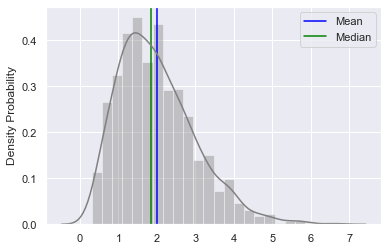

In [27]:

dist_df = new_mdg_carbon_emission["1990"] 
dist_df = np.random.gamma(4, 0.5,1000)
mean = dist_df.mean()
median = np.median(dist_df)
plt.ylabel("Density Probability")
plt.axvline(mean,color = 'blue',label = 'Mean')
plt.axvline(median,color = 'green',label = 'Median')

_ = sns.distplot(dist_df,color = "grey")
_ = plt.legend()


The histogram is positively skewed to the right as expected

# 6. The standard deviation and standard error of the mean for CO2 emission in 1990

In [28]:
stand_dev = new_mdg_carbon_emission['1990'].std()
print("Standard deviation for CO2 emission in 1990 = ", stand_dev)
stand_error = new_mdg_carbon_emission['1990'].sem()
print("Standard error of the mean for CO2 emission in 1990 = ",stand_error)

Standard deviation for CO2 emission in 1990 =  399886.4374635775
Standard error of the mean for CO2 emission in 1990 =  27146.060204788268


# 7. Line graph for top 6 countries per continent 

In [29]:
#Checking the index of the countries
brasil = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='Brazil']
russia = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='Russian Federation']
china = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='China']
india = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='India']
usa = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='United States']
rsa = new_mdg_carbon_emission['Country'][new_mdg_carbon_emission['Country']=='South Africa']

In [30]:
print(brasil)
print(russia)
print(china)
print(india)
print(usa)
print(rsa)

82    Brazil
Name: Country, dtype: object
499    Russian Federation
Name: Country, dtype: object
124    China
Name: Country, dtype: object
277    India
Name: Country, dtype: object
652    United States
Name: Country, dtype: object
562    South Africa
Name: Country, dtype: object


In [31]:
Top_6_continent = new_mdg_carbon_emission.loc[(82,124,277,499,562,652),:]

In [32]:
Line_graph = Top_6_continent.groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011')].apply(lambda x : x.astype(float).sum()).reset_index().groupby('Country')[('1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011')].apply(lambda x : x.astype(float).sum()).reset_index()
Line_graph

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Brazil,208887.000,219330.600,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,...,332266.9,321621.6,337826.0,347308.9,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9
1,China,2460744.000,2584538.300,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,...,3694242.1,4525177.0,5288166.0,5790017.0,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2
2,India,690576.800,737851.700,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1226791.2,1281913.5,1348524.6,1411127.6,1504364.7,1611199.1,1793075.0,1965820.0,1950950.3,2074344.9
3,Russian Federation,1660533.845,1660533.845,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1557660.9,1604968.9,1602955.7,1615687.5,1669618.1,1667597.6,1715639.0,1574367.8,1742540.1,1808073.0
4,South Africa,319795.400,332618.900,307822.6,321104.5,337576.7,353458.5,358639.9,371327.8,372218.8,...,347686.6,380810.6,424774.3,391819.0,422445.7,440989.8,469090.0,477806.4,454950.0,477241.7
5,United States,4823557.100,4822383.700,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5648727.5,5679222.2,5763456.9,5795161.8,5703871.8,5794923.4,5622464.4,5274132.4,5408869.0,5305569.6


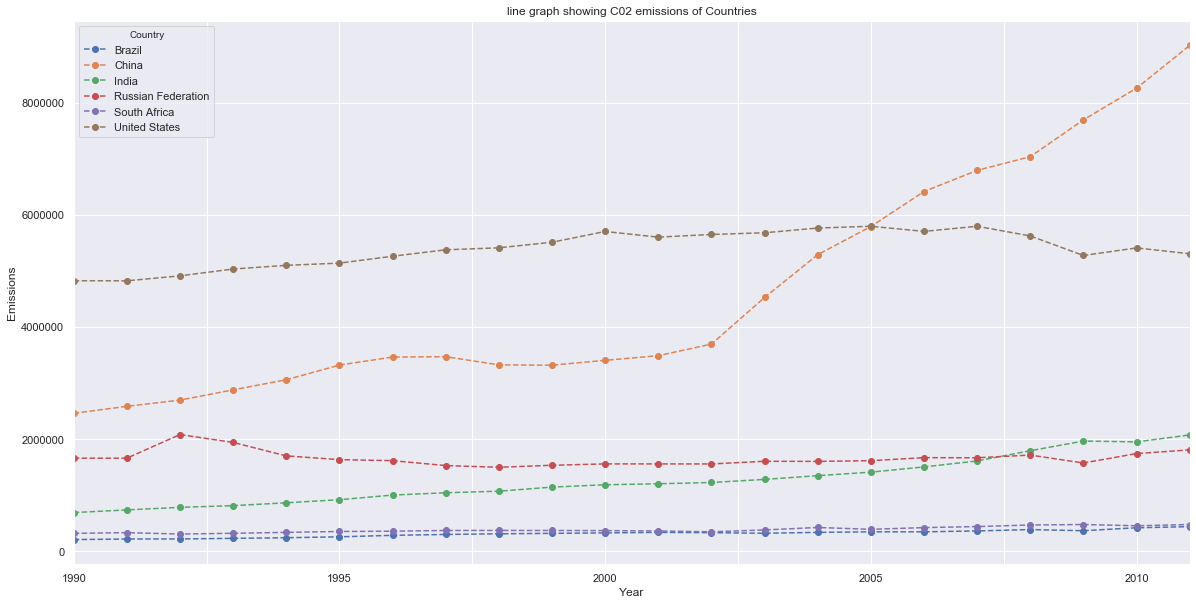

In [33]:
line_graph = Line_graph.set_index("Country").T

# fig, ax = plt.subplots(figsize = (10,4))
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('line graph showing C02 emissions of Countries')
ax.set_ylabel('Emissions')
ax.set_xlabel("Year")
_ = line_graph.plot(ax=ax,linestyle='--', marker='o')

* Brazil and South Africa has slightly increasing trend over the years until 2011
* India has also  been increasing at a constant rate over years until 2011
* Rusian Federation has been almost at a consitant from 1995 until 2011, droping from 1992
* USA has been increasing then later slighty dropped until 2011
* China has a rapid increasing trend from 1990 to 2011, surpassing USA after 2005, USA has been leading until 2005


# 8. The mean and standard deviation for land area covered by forest in 1990

In [34]:
new_mdg_proportion_of_land['1990']
stand_dev = new_mdg_proportion_of_land['1990'].std()
print("Standard deviation for land area covered by forest in 1990 = ", stand_dev)
mean = new_mdg_proportion_of_land['1990'].mean()
print("mean for land area covered by forest in 1990 = ",mean)

Standard deviation for land area covered by forest in 1990 =  25.497512099375246
mean for land area covered by forest in 1990 =  32.97713004484306


# 9. Histograms for land area covered by forest and percentage of area protected in 1990

In [35]:
land_by_forest_1990 = new_mdg_proportion_of_land.loc[:, ('Country', '1990')].reset_index(drop=True)
land_by_forest_1990.head()

,Country,1990
0,Afghanistan,2.1
1,Albania,28.8
2,Algeria,0.7
3,American Samoa,90.0
4,Andorra,35.6


In [36]:
protected_area_1990 = new_mdg_terrestrail.loc[:, ('Country', '1990')].reset_index(drop=True)
protected_area_1990.head()

,Country,1990
0,Afghanistan,0.36
1,Albania,0.15
2,Algeria,5.97
3,American Samoa,0.06
4,Andorra,5.53


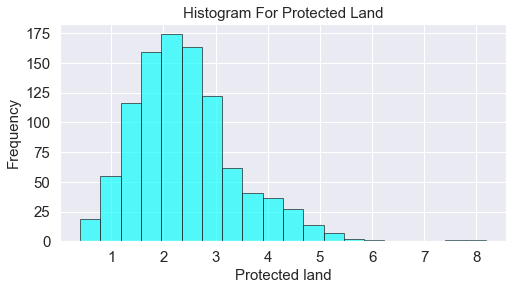

In [37]:
#Defining the measures of central tendency
mean = protected_area_1990.mean()
median = protected_area_1990.median()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
protected_area_1990 = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Protected land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram For Protected Land',fontsize = 15)

plot = plt.hist(protected_area_1990.astype(float), bins = 20,
                color='cyan',edgecolor = 'k', alpha = 0.65)



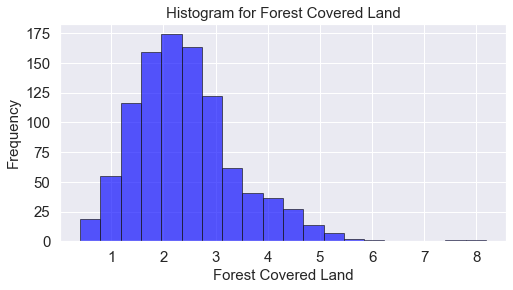

In [38]:
#Defining the measures of central tendency
mean = land_by_forest_1990.mean()
median = land_by_forest_1990.median()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
land_by_forest_1990 = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Forest Covered Land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram for Forest Covered Land',fontsize = 15)

plot = plt.hist(protected_area_1990.astype(float), 
                bins = 20, color='blue',edgecolor = 'k', alpha = 0.65)

# 10. Scatterplot with a regression line using seaborn.regplot to show the relationship between the proportion of land area covered by forest and the percentage of area protected by land in 2000

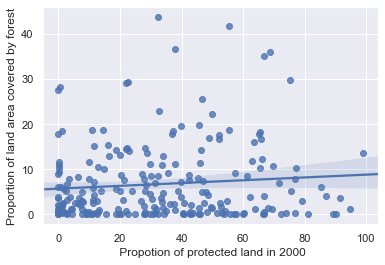

In [39]:

#regression plot 
ax= sns.regplot(x=new_mdg_proportion_of_land["2000"].astype(float), y=new_mdg_terrestrail["2000"].astype(float))
ax.set(xlabel=' Propotion of protected land in 2000', ylabel='Proportion of land area covered by forest')
plt.show()

* The scatter plot show slightly positive relationship between protected land and land area covered by forest
* There's evedidence of extreme values/outliers within the scatter plot
* Due to the weak relationship, the data is more spread out which is why we have existing extreme values

# 11.log transform variables in order to calculate a correlation coefficient. Log transform variables and show the transformed distributions in a histogram.

In [40]:
protected_area_log =  np.log10(new_mdg_terrestrail["2000"].astype(float).reset_index(drop=True))
forest_covered_land_log = np.log10(new_mdg_proportion_of_land["2000"].astype(float).reset_index(drop=True))

#replacing inf with zero to keep the length of both datasets equal
from numpy import inf
protected_area_log[protected_area_log == -inf] = 0
forest_covered_land_log[forest_covered_land_log == -inf] = 0

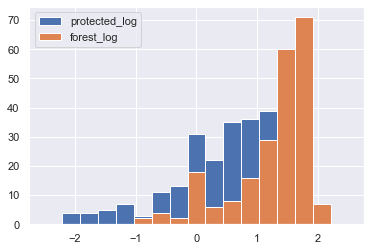

In [41]:
x = protected_area_log
y = forest_covered_land_log

from matplotlib import pyplot
bins = np.linspace(-2.5, 2.5, 18)

pyplot.hist(x, bins, alpha=1, label='protected_log')
pyplot.hist(y, bins, alpha=1, label='forest_log')
pyplot.legend(loc='upper left')
pyplot.show()

In [42]:
correlation = forest_covered_land_log.corr(protected_area_log) 
correlation

-0.05167984690871535

* The correlation value shows that there's weak relationship between protected area and land covered by forest in 2000


# 12. Using the pearsonr function to calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between proportion of land area covered by forest and the percentage of area protected (as measured in 1990 and log transformed).

**Hypothesis Testing**

* **Null hypothesis** - There is significant relationship between **protected area** and **Land covered by forest**
* **Alternate hypothesis** - There is no significant relationship between **protected area** and **Land covered by forest**

#### Log Transformed

* **P values of log transformed** 

In [43]:
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr

In [44]:
print(f'•The p-values of transformed data =', pearsonr(x,y))

•The p-values of transformed forest and protected land = (-0.0516798469087153, 0.44253418184782095)


* **Spearman of log transformed** 

In [46]:
print(f'•Results for log transformed data ', spearmanr(x,y))


•Results for log transformed data  SpearmanrResult(correlation=0.020386789948164157, pvalue=0.7620725790841409)


#### 1990 data


* **P values of 1990** 

In [48]:
X = new_mdg_terrestrail["1990"]
Y = new_mdg_proportion_of_land["1990"]

print(f'•The p-values of 1990 data =', pearsonr(X,Y))

•The p-values of 1990 data = (0.05942550355603854, 0.3771251547433263)


* **Spearman of log transformed**

In [49]:
print(f'•Results for log transformed data ', spearmanr(X,Y))

•Results for log transformed data  SpearmanrResult(correlation=-0.026829850964664028, pvalue=0.6902799173597335)
